# Machine Learning IPN - Trabajo 24 marzo 2021
## Rodolfo Martínez Vega

En este trabajo usaremos a `datasets/iris.data`, el cuál contiene 5 columnas con información de las medidas de las flores Iris y su clasificación de muestras. En las siguientes celdas se muestra la extracción y estructuración de las 150 muestras en los conjuntos `X` y `Y`.

Revise los códigos y resuelva los puntos marcados al final.

## Ejercicios - Redes neuronales

1. Continua el estudio de clase para el reconocimiento de dígitos de `notebooks/12. Multilayer Neural Network Classifier.ipynb`.
2. Dibuja en paint un dígito a mano y guardalo como una imagen PNG.
3. Abre la imagen en Python con Pillow. Pista https://www.geeksforgeeks.org/python-pil-image-resize-method/
4. Escala la imagen a 28x28 pixeles.
5. Convierte la imagen a un array de numpy. Pista https://www.geeksforgeeks.org/how-to-convert-images-to-numpy-array/
6. Usa `rgb2gray` de `skimage` para convertir la imagen de RGB a escala de grises. https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_rgb_to_gray.html#sphx-glr-auto-examples-color-exposure-plot-rgb-to-gray-py
7. Refigura la imagen para que sea un vector de 784 entradas.
8. Predice que dígito responde el clasificador y comenta si funcionó o se equivocó.

## Solución

### Leer y escalar la imagen

In [123]:
from PIL import Image

img = Image.open(r"./2021-03-24-img-8n.png")

# Escalar la imagen a 28x28 pixeles
newsize = (28, 28)
img = img.resize(newsize)

img

### Convertir la imagen en un array de Numpy

In [124]:
from numpy import asarray

numpydata = asarray(img)

print(numpydata.shape)

(28, 28, 4)


### Convertir a escala de grises

Text(0.5, 1.0, 'Grayscale')

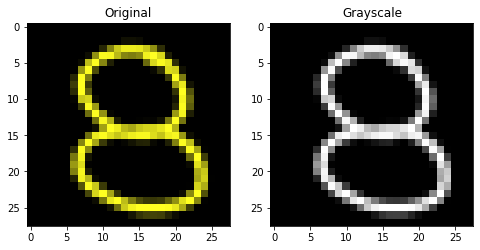

In [125]:
import matplotlib.pyplot as plt

# pip install scikit-image
from skimage import data
from skimage.color import rgb2gray, rgba2rgb

grayscale = rgb2gray(rgba2rgb(numpydata))

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")


### Reconfigurar la imagen a vector de 784 entradas

In [126]:
import numpy as np

img_vector = np.reshape(grayscale, 784)

img_vector

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05878667,
       0.05878667, 0.04423137, 0.        , 0.        , 0.     

### Entrenar red neuronal

In [39]:
import os
import gzip
import numpy as np
from sklearn.neural_network import MLPClassifier

train_labels_path = "../notebooks/datasets/mnist/train-labels-idx1-ubyte.gz"

with gzip.open(train_labels_path, "rb") as data:
    train_labels = np.frombuffer(data.read(), dtype=np.uint8, offset=8)

train_images_path = "../notebooks/datasets/mnist/train-images-idx3-ubyte.gz"

with gzip.open(train_images_path, "rb") as data:
    train_images = np.frombuffer(data.read(), dtype=np.uint8, offset=16).reshape(len(train_labels), 784)

print("Train Labels", train_labels.shape)
print("Train Images", train_images.shape)

def enconder(digit):
    if digit == 0:
        return [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    elif digit == 1:
        return [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
    elif digit == 2:
        return [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
    elif digit == 3:
        return [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    elif digit == 4:
        return [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
    elif digit == 5:
        return [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
    elif digit == 6:
        return [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
    elif digit == 7:
        return [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
    elif digit == 8:
        return [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
    elif digit == 9:
        return [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
    else:
        return [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

train_labels_enc = np.array(list(map(enconder, train_labels)))

clf = MLPClassifier(hidden_layer_sizes=(15,))

clf.fit(train_images, train_labels_enc)

Train Labels (60000,)
Train Images (60000, 784)


MLPClassifier(hidden_layer_sizes=(15,))

In [134]:
def decode(dig_enc):
    maxv = 0
    maxi = 0
    for index, value in enumerate(dig_enc):
        if value > maxv:
            maxv = value
            maxi = index
    return maxi

predict_label = clf.predict([img_vector])

print("predict_label: ", predict_label[0])
print("predict_number: ", decode(predict_label[0]))


predict_label:  [0 0 0 0 0 0 1 0 0 0]
predict_number:  6


### Conclusión: Se equivocó, siempre detecta que es un 6

### Test images from mnist

In [133]:
test_labels_path = "../notebooks/datasets/mnist/t10k-labels-idx1-ubyte.gz"

with gzip.open(test_labels_path, "rb") as data:
    test_labels = np.frombuffer(data.read(), dtype=np.uint8, offset=8)

test_images_path = "../notebooks/datasets/mnist/t10k-images-idx3-ubyte.gz"

with gzip.open(test_images_path, "rb") as data:
    test_images = np.frombuffer(data.read(), dtype=np.uint8, offset=16).reshape(len(test_labels), 784)

predict_label = clf.predict([test_images[1]])

print("predict_label: ", predict_label[0])
print("predict_number: ", decode(predict_label[0]))

predict_label:  [0 0 1 0 0 0 0 0 0 0]
predict_number:  2
